## Clustering

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# import dataset
df = pd.read_csv('../Without Feature Selection/UFC_clustering.csv')
df.head()

,R_fighter,B_fighter,location,weight_class,B_Stance,R_Stance,Winner,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,gender
0,Jorge Masvidal,Al Iaquinta,"Fairfax, Virginia, USA",5,Orthodox,Orthodox,Blue,0.768371,0.000000,0.332278,...,1.609438,0.000000,0.693147,0.000000,5.817944,5.832938,5.655992,3.871201,3.912023,1
1,Josh Koscheck,Johny Hendricks,"East Rutherford, New Jersey, USA",6,Southpaw,Orthodox,Blue,0.527867,0.000000,0.578499,...,1.791759,1.945910,1.386294,0.000000,5.810362,5.825469,5.655992,3.891820,3.988984,1
2,John Dodson,Manvel Gamburyan,"Tampa, Florida, USA",3,Orthodox,Orthodox,Red,0.405465,0.236337,0.323143,...,1.098612,1.386294,0.000000,0.693147,5.755616,5.771566,5.525453,4.007333,3.931826,1
3,Tony Ferguson,Katsunori Kikuno,"Las Vegas, Nevada, USA",5,Orthodox,Orthodox,Red,0.000000,0.000000,0.385262,...,0.693147,0.693147,0.693147,0.693147,5.817944,5.847710,5.602119,3.970292,3.912023,1
4,Richard Walsh,Viscardi Andrade,"Brisbane, Queensland, Australia",6,Orthodox,Orthodox,Blue,0.405465,0.000000,0.378436,...,1.098612,0.000000,0.000000,0.000000,5.825469,5.825469,5.655992,3.970292,3.850148,1


In [3]:
df.describe()

,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,gender
count,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,...,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000
mean,5.257779,0.196572,0.133731,0.369996,0.352873,0.234593,0.205544,0.291973,0.241509,0.111486,...,0.820077,0.764840,0.516008,0.048214,5.811328,5.817873,5.637948,3.927906,3.919467,0.907959
std,2.174417,0.253601,0.216103,0.081583,0.082620,0.193145,0.182558,0.356190,0.319638,0.211085,...,0.636115,0.685355,0.603205,0.182866,0.027122,0.032458,0.118370,0.076738,0.080766,0.289131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.739407,5.722931,5.442418,3.713572,3.663562,0.000000
25%,4.000000,0.000000,0.000000,0.321177,0.301493,0.045810,0.040422,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.795024,5.795024,5.564520,3.871201,3.871201,1.000000
50%,5.000000,0.060625,0.000000,0.371025,0.351289,0.223144,0.172771,0.128575,0.061543,0.000000,...,0.693147,0.693147,0.000000,0.000000,5.810362,5.817944,5.602119,3.931826,3.912023,1.000000
75%,7.000000,0.405465,0.223144,0.419121,0.405048,0.405465,0.323017,0.485508,0.405465,0.117783,...,1.386294,1.386294,1.098612,0.000000,5.832938,5.840351,5.707110,3.970292,3.970292,1.000000
max,9.000000,1.386294,1.386294,0.693147,0.693147,0.693147,0.693147,2.079442,2.079442,1.386294,...,2.397895,2.484907,2.639057,1.098612,5.904708,5.904708,5.942799,4.219508,4.189655,1.000000


### Clustering 1
Pada clustering ini pertanyaannya adalah cluster apa saja yang terbentuk dari tendensi para petarung memenangkan pertandingan mereka (TKO, Submission, Decision_majority, Decision_split, Decision_Unanimous, TKO_Doctor_stoppage)

In [4]:
features_to_keep = ["B_fighter", "R_fighter", "B_win_by_Decision_Majority", "R_win_by_Decision_Majority", "B_win_by_Decision_Split", "R_win_by_Decision_Split", "B_win_by_Decision_Unanimous", "R_win_by_Decision_Unanimous", "B_win_by_KO/TKO", "R_win_by_KO/TKO", "B_win_by_Submission", "R_win_by_Submission"]

df_cluster = df[features_to_keep]

df_cluster.head()

,B_fighter,R_fighter,B_win_by_Decision_Majority,R_win_by_Decision_Majority,B_win_by_Decision_Split,R_win_by_Decision_Split,B_win_by_Decision_Unanimous,R_win_by_Decision_Unanimous,B_win_by_KO/TKO,R_win_by_KO/TKO,B_win_by_Submission,R_win_by_Submission
0,Al Iaquinta,Jorge Masvidal,0.000000,0.0,0.000000,0.000000,1.386294,1.609438,1.386294,0.000000,0.000000,0.693147
1,Johny Hendricks,Josh Koscheck,0.693147,0.0,0.693147,0.693147,0.693147,1.791759,1.609438,1.945910,0.000000,1.386294
2,Manvel Gamburyan,John Dodson,0.000000,0.0,0.000000,0.000000,1.386294,1.098612,0.000000,1.386294,1.386294,0.000000
3,Katsunori Kikuno,Tony Ferguson,0.000000,0.0,0.000000,0.000000,0.693147,0.693147,0.000000,0.693147,0.000000,0.693147
4,Viscardi Andrade,Richard Walsh,0.000000,0.0,0.000000,0.000000,0.693147,1.098612,0.693147,0.000000,0.000000,0.000000


In [5]:
df = df.drop_duplicates(subset=['B_fighter', 'R_fighter'])

# B_fighter df
df_B_fighter = df[['B_fighter', 'B_win_by_Decision_Majority', 'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission']]

# Rename all columns to remove the 'B_' prefix
df_B_fighter.columns = df_B_fighter.columns.str.replace('B_', '')

# R_fighter df
df_R_fighter = df[['R_fighter', 'R_win_by_Decision_Majority', 'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission']]

# Rename all columns to remove the 'R_' prefix
df_R_fighter.columns = df_R_fighter.columns.str.replace('R_', '')

# Combine the two DFs
df_fighter = pd.concat([df_B_fighter, df_R_fighter])

df_fighter.head()


,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission
0,Al Iaquinta,0.000000,0.000000,1.386294,1.386294,0.000000
1,Johny Hendricks,0.693147,0.693147,0.693147,1.609438,0.000000
2,Manvel Gamburyan,0.000000,0.000000,1.386294,0.000000,1.386294
3,Katsunori Kikuno,0.000000,0.000000,0.693147,0.000000,0.000000
4,Viscardi Andrade,0.000000,0.000000,0.693147,0.693147,0.000000


In [6]:
df_fighter.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,6042.0,0.018490,0.112355,0.0,0.0,0.000000,0.000000,1.098612
win_by_Decision_Split,6042.0,0.243238,0.385693,0.0,0.0,0.000000,0.693147,1.791759
win_by_Decision_Unanimous,6042.0,0.725908,0.623313,0.0,0.0,0.693147,1.098612,2.397895
win_by_KO/TKO,6042.0,0.680393,0.663621,0.0,0.0,0.693147,1.098612,2.484907
win_by_Submission,6042.0,0.460283,0.580783,0.0,0.0,0.000000,0.693147,2.708050


In [7]:
df_fighter.drop_duplicates(subset=['fighter'], inplace=True)

In [8]:
# Change index with range
df_fighter.reset_index(drop=True, inplace=True)
df_fighter.head()

,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission
0,Al Iaquinta,0.000000,0.000000,1.386294,1.386294,0.000000
1,Johny Hendricks,0.693147,0.693147,0.693147,1.609438,0.000000
2,Manvel Gamburyan,0.000000,0.000000,1.386294,0.000000,1.386294
3,Katsunori Kikuno,0.000000,0.000000,0.693147,0.000000,0.000000
4,Viscardi Andrade,0.000000,0.000000,0.693147,0.693147,0.000000


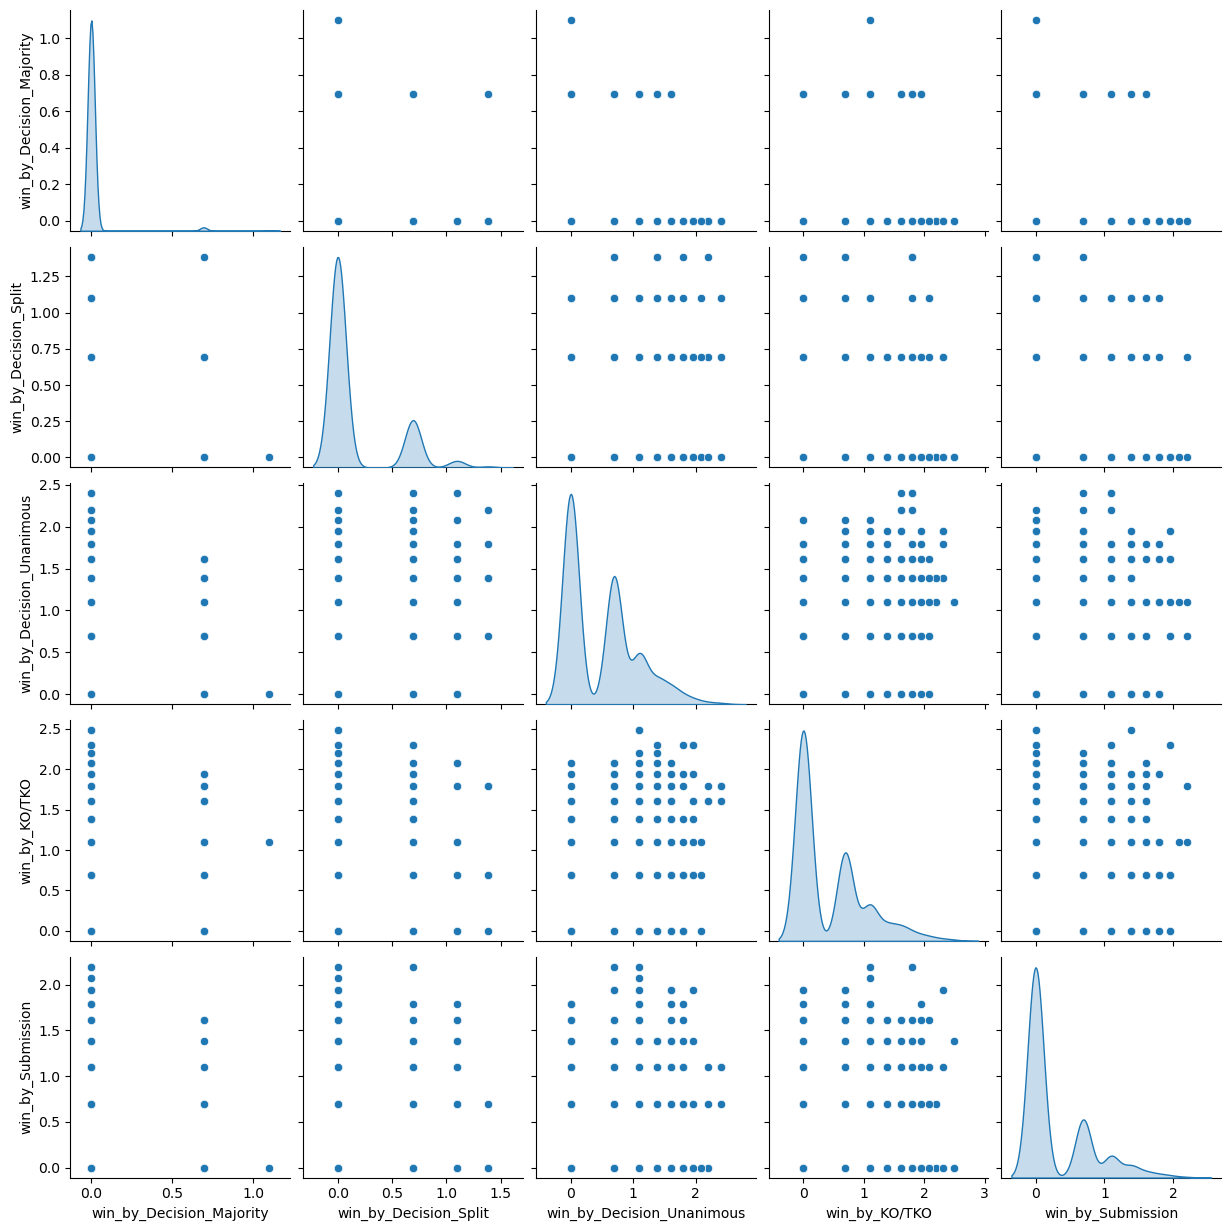

In [9]:
# Pairplot
sns.pairplot(df_fighter, diag_kind='kde')

In [10]:
# Standardize features
scaler = StandardScaler()
df_fighter_scaled = scaler.fit_transform(df_fighter.drop(columns=['fighter']))

# Combine with fighter column
df_fighter_scaled = pd.DataFrame(df_fighter_scaled, columns=df_fighter.drop(columns=['fighter']).columns)


In [11]:
# Import KMeans
from sklearn.cluster import KMeans

clustering_scores = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_fighter_scaled)
    clustering_scores.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.


In [12]:
# Plotting Elbow Method
plt.figure(figsize=(12, 8))
plt.plot(range(2, 10), clustering_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared error')
plt.title('Elbow Method')

Text(0.5, 1.0, 'Elbow Method')

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

num_of_cluster = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

silhouette_avg_list = []

fig, ax = plt.subplots(9, 2, figsize=(30,10))
for k in num_of_cluster:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k, n_init=10, random_state=42)

    # Draw silhouette diagram
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(df_fighter_scaled)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(df_fighter_scaled)
    silhouette_avg = silhouette_score(df_fighter_scaled, cluster_labels)
    silhouette_avg_list.append((k, silhouette_avg))
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_coefficient is : 0.35676505309619994
For n_clusters = 3 The average silhouette_coefficient is : 0.35984565921684936
For n_clusters = 4 The average silhouette_coefficient is : 0.3759739170805169
For n_clusters = 5 The average silhouette_coefficient is : 0.35309418728895736
For n_clusters = 6 The average silhouette_coefficient is : 0.3903597854878215
For n_clusters = 7 The average silhouette_coefficient is : 0.4000170050527545
For n_clusters = 8 The average silhouette_coefficient is : 0.43790952403221345
For n_clusters = 9 The average silhouette_coefficient is : 0.5122521428872809
For n_clusters = 10 The average silhouette_coefficient is : 0.5474257999805286
For n_clusters = 11 The average silhouette_coefficient is : 0.5567529394193872
For n_clusters = 12 The average silhouette_coefficient is : 0.5727220621289719
For n_clusters = 13 The average silhouette_coefficient is : 0.5786683737883029
For n_clusters = 14 The average silhouette_coefficient i

In [14]:
# Plot silhouette score
plt.figure(figsize=(12, 8))
plt.plot(*zip(*silhouette_avg_list), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')


Text(0.5, 1.0, 'Silhouette Score')

In [15]:
# Add cluster labels to df_fighter
kmeans = KMeans(n_clusters=17, random_state=42)
kmeans.fit(df_fighter_scaled)
df_fighter['cluster'] = kmeans.labels_

df_fighter.head()

,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
0,Al Iaquinta,0.000000,0.000000,1.386294,1.386294,0.000000,8
1,Johny Hendricks,0.693147,0.693147,0.693147,1.609438,0.000000,4
2,Manvel Gamburyan,0.000000,0.000000,1.386294,0.000000,1.386294,16
3,Katsunori Kikuno,0.000000,0.000000,0.693147,0.000000,0.000000,0
4,Viscardi Andrade,0.000000,0.000000,0.693147,0.693147,0.000000,9


In [16]:
# Count each cluster
df_fighter['cluster'].value_counts()

5     233
0     186
6     142
11     96
9      66
16     65
3      62
2      54
13     53
8      51
14     44
7      40
10     39
1      37
15     31
12     31
4      21
Name: cluster, dtype: int64

In [22]:
# Split features and cluster
X = df_fighter_scaled
y = df_fighter['cluster']



In [67]:
# PCA to 2 dimensions
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# pca.fit(df_fighter_scaled)

# df_fighter_pca = pca.transform(X)

# df_fighter_pca = pd.DataFrame(df_fighter_pca, columns=['pca1', 'pca2'])
# df_fighter_pca['cluster'] = y

# df_fighter_pca.head()

In [68]:
# Plot PCA
# plt.figure(figsize=(12, 8))
# sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_fighter_pca, palette='Set1')
# plt.title('KMeans with 17 clusters')

# plt.show()

In [35]:
# Interpretasi cluster
cluster_0 = df_fighter[df_fighter['cluster'] == 0]

cluster_0.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,186.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Split,186.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Unanimous,186.0,0.829662,0.267722,0.693147,0.693147,0.693147,0.693147,2.079442
win_by_KO/TKO,186.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Submission,186.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cluster,186.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [54]:
cluster_0.head()

,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
3,Katsunori Kikuno,0.0,0.0,0.693147,0.0,0.0,0
6,Adlan Amagov,0.0,0.0,0.693147,0.0,0.0,0
10,Jonathan Martinez,0.0,0.0,0.693147,0.0,0.0,0
18,Richard Walsh,0.0,0.0,0.693147,0.0,0.0,0
20,Nik Lentz,0.0,0.0,1.386294,0.0,0.0,0


In [37]:
cluster_1 = df_fighter[df_fighter['cluster'] == 1]

cluster_1.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,37.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Split,37.0,0.829241,0.220808,0.693147,0.693147,0.693147,1.098612,1.386294
win_by_Decision_Unanimous,37.0,1.522470,0.440056,0.693147,1.098612,1.386294,1.791759,2.397895
win_by_KO/TKO,37.0,1.501863,0.440656,0.693147,1.098612,1.609438,1.791759,2.302585
win_by_Submission,37.0,0.287372,0.411512,0.000000,0.000000,0.000000,0.693147,1.098612
cluster,37.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
cluster_1.head()

,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
25,Jake Ellenberger,0.0,0.693147,1.098612,1.609438,0.000000,1
77,Chris Leben,0.0,0.693147,1.098612,1.945910,1.098612,1
96,Robbie Lawler,0.0,0.693147,1.386294,1.791759,0.000000,1
125,Michael Johnson,0.0,0.693147,1.945910,1.609438,0.000000,1
140,Mark Munoz,0.0,0.693147,1.386294,1.609438,0.000000,1


In [38]:
cluster_2 = df_fighter[df_fighter['cluster'] == 2]

cluster_2.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,54.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Split,54.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Unanimous,54.0,0.842103,0.232334,0.693147,0.693147,0.693147,1.098612,1.386294
win_by_KO/TKO,54.0,0.576658,0.332364,0.000000,0.693147,0.693147,0.693147,1.098612
win_by_Submission,54.0,1.131973,0.405028,0.693147,0.693147,1.098612,1.386294,1.945910
cluster,54.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [56]:
cluster_2.head()

,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
12,Charles Oliveira,0.0,0.0,0.693147,0.000000,1.945910,2
23,Steven Siler,0.0,0.0,1.386294,0.693147,0.693147,2
47,Brian Stann,0.0,0.0,1.098612,1.098612,0.693147,2
59,TJ Waldburger,0.0,0.0,0.693147,0.000000,1.386294,2
61,Matt Wiman,0.0,0.0,1.098612,1.098612,0.693147,2


In [40]:
cluster_3 = df_fighter[df_fighter['cluster'] == 3]

cluster_3.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,62.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Split,62.0,0.743566,0.146504,0.693147,0.693147,0.693147,0.693147,1.386294
win_by_Decision_Unanimous,62.0,0.848842,0.269737,0.693147,0.693147,0.693147,1.098612,1.791759
win_by_KO/TKO,62.0,0.257135,0.337568,0.000000,0.000000,0.000000,0.693147,0.693147
win_by_Submission,62.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cluster,62.0,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [58]:
cluster_3.head()

,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
7,Duane Ludwig,0.0,0.693147,1.098612,0.693147,0.0,3
19,Andrew Craig,0.0,0.693147,0.693147,0.693147,0.0,3
33,Chris Cariaso,0.0,0.693147,0.693147,0.000000,0.0,3
37,Alexa Grasso,0.0,0.693147,0.693147,0.000000,0.0,3
39,Alex Morono,0.0,0.693147,0.693147,0.000000,0.0,3


In [41]:
cluster_4 = df_fighter[df_fighter['cluster'] == 4]

cluster_4.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,21.0,0.712455,0.088480,0.693147,0.693147,0.693147,0.693147,1.098612
win_by_Decision_Split,21.0,0.198042,0.388587,0.000000,0.000000,0.000000,0.000000,1.386294
win_by_Decision_Unanimous,21.0,0.673302,0.610291,0.000000,0.000000,0.693147,1.098612,1.609438
win_by_KO/TKO,21.0,1.108445,0.733585,0.000000,0.693147,1.098612,1.791759,1.945910
win_by_Submission,21.0,0.370630,0.585918,0.000000,0.000000,0.000000,0.693147,1.609438
cluster,21.0,4.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [59]:
cluster_4.head()

,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
1,Johny Hendricks,0.693147,0.693147,0.693147,1.609438,0.000000,4
21,Matt Hamill,0.693147,0.000000,1.386294,1.791759,0.000000,4
24,Ovince Saint Preux,0.693147,0.000000,0.000000,1.609438,0.693147,4
38,Dustin Poirier,0.693147,0.000000,1.609438,1.791759,1.386294,4
81,Stefan Struve,0.693147,0.000000,0.693147,1.609438,1.609438,4


In [42]:
cluster_5 = df_fighter[df_fighter['cluster'] == 5]

cluster_5.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,233.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
win_by_Decision_Split,233.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
win_by_Decision_Unanimous,233.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
win_by_KO/TKO,233.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
win_by_Submission,233.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cluster,233.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0


In [60]:
cluster_5.head()

,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
8,Craig White,0.0,0.0,0.0,0.0,0.0,5
13,Rashad Coulter,0.0,0.0,0.0,0.0,0.0,5
16,Journey Newson,0.0,0.0,0.0,0.0,0.0,5
30,Lando Vannata,0.0,0.0,0.0,0.0,0.0,5
41,Yosdenis Cedeno,0.0,0.0,0.0,0.0,0.0,5


In [43]:
cluster_6 = df_fighter[df_fighter['cluster'] == 6]

cluster_6.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,142.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Split,142.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Unanimous,142.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_KO/TKO,142.0,0.838039,0.258908,0.693147,0.693147,0.693147,1.098612,1.791759
win_by_Submission,142.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cluster,142.0,6.000000,0.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [61]:
cluster_6.head()

,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
9,Rafael Cavalcante,0.0,0.0,0.0,0.693147,0.0,6
15,Brian Ortega,0.0,0.0,0.0,0.693147,0.0,6
53,Todd Duffee,0.0,0.0,0.0,0.693147,0.0,6
72,Antonio Silva,0.0,0.0,0.0,1.386294,0.0,6
83,Abel Trujillo,0.0,0.0,0.0,1.386294,0.0,6


In [44]:
cluster_7 = df_fighter[df_fighter['cluster'] == 7]

cluster_7.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,40.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Split,40.0,0.801706,0.195374,0.693147,0.693147,0.693147,0.794513,1.386294
win_by_Decision_Unanimous,40.0,1.224537,0.383655,0.693147,0.997246,1.242453,1.609438,1.945910
win_by_KO/TKO,40.0,0.690541,0.375102,0.000000,0.693147,0.693147,1.098612,1.386294
win_by_Submission,40.0,1.127752,0.374470,0.693147,0.693147,1.098612,1.386294,2.197225
cluster,40.0,7.000000,0.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [63]:
cluster_7.head()

,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
89,Kelvin Gastelum,0.0,1.098612,0.693147,0.693147,1.098612,7
94,Evan Dunham,0.0,1.386294,1.386294,0.693147,0.693147,7
108,Martin Kampmann,0.0,1.098612,1.098612,1.098612,1.791759,7
130,Tony Ferguson,0.0,0.693147,1.098612,1.098612,1.791759,7
152,Clay Guida,0.0,1.098612,1.098612,0.693147,1.609438,7


In [45]:
cluster_8 = df_fighter[df_fighter['cluster'] == 8]

cluster_8.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,51.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Split,51.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Unanimous,51.0,0.899750,0.337146,0.693147,0.693147,0.693147,1.098612,1.945910
win_by_KO/TKO,51.0,1.472801,0.391926,1.098612,1.098612,1.386294,1.609438,2.484907
win_by_Submission,51.0,0.040773,0.164716,0.000000,0.000000,0.000000,0.000000,0.693147
cluster,51.0,8.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [64]:
cluster_8.head()

,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
0,Al Iaquinta,0.0,0.0,1.386294,1.386294,0.000000,8
69,Matt Mitrione,0.0,0.0,0.693147,1.609438,0.000000,8
84,Travis Browne,0.0,0.0,0.693147,2.079442,0.693147,8
100,Ben Rothwell,0.0,0.0,0.693147,1.098612,0.000000,8
111,Conor McGregor,0.0,0.0,0.693147,1.945910,0.000000,8


In [46]:
cluster_9 = df_fighter[df_fighter['cluster'] == 9]

cluster_9.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,66.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Split,66.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Unanimous,66.0,0.989785,0.310968,0.693147,0.693147,1.098612,1.098612,1.945910
win_by_KO/TKO,66.0,0.742294,0.133347,0.693147,0.693147,0.693147,0.693147,1.098612
win_by_Submission,66.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cluster,66.0,9.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [65]:
cluster_9.head()

,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
4,Viscardi Andrade,0.0,0.0,0.693147,0.693147,0.0,9
27,Jack Marshman,0.0,0.0,0.693147,0.693147,0.0,9
44,Tim Boetsch,0.0,0.0,1.098612,1.098612,0.0,9
48,Alexander Volkanovski,0.0,0.0,1.386294,1.098612,0.0,9
67,Johnny Eduardo,0.0,0.0,0.693147,0.693147,0.0,9


In [47]:
cluster_10 = df_fighter[df_fighter['cluster'] == 10]

cluster_10.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,39.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Split,39.0,0.713940,0.090604,0.693147,0.693147,0.693147,0.693147,1.098612
win_by_Decision_Unanimous,39.0,0.365857,0.366899,0.000000,0.000000,0.693147,0.693147,1.098612
win_by_KO/TKO,39.0,0.198523,0.352453,0.000000,0.000000,0.000000,0.346574,1.098612
win_by_Submission,39.0,0.819242,0.227809,0.693147,0.693147,0.693147,0.895880,1.386294
cluster,39.0,10.000000,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [66]:
cluster_10.head()

,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
5,Alexandre Pantoja,0.0,0.693147,0.693147,0.0,1.098612,10
63,Mara Romero Borella,0.0,0.693147,0.000000,0.0,0.693147,10
98,Jake Matthews,0.0,0.693147,0.693147,0.0,1.386294,10
107,Ildemar Alcantara,0.0,1.098612,0.693147,0.0,0.693147,10
135,Valentina Shevchenko,0.0,0.693147,0.693147,0.0,0.693147,10


In [48]:
cluster_11 = df_fighter[df_fighter['cluster'] == 11]

cluster_11.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,96.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Split,96.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Unanimous,96.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_KO/TKO,96.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Submission,96.0,0.792603,0.217178,0.693147,0.693147,0.693147,0.693147,1.791759
cluster,96.0,11.000000,0.000000,11.000000,11.000000,11.000000,11.000000,11.000000


In [69]:
cluster_11.head()

,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
28,Damian Stasiak,0.0,0.0,0.0,0.0,0.693147,11
50,Russell Doane,0.0,0.0,0.0,0.0,0.693147,11
56,Daniel Sarafian,0.0,0.0,0.0,0.0,0.693147,11
68,Bryan Caraway,0.0,0.0,0.0,0.0,1.386294,11
91,Mike Pyle,0.0,0.0,0.0,0.0,0.693147,11


In [49]:
cluster_12 = df_fighter[df_fighter['cluster'] == 12]

cluster_12.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,31.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Split,31.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Unanimous,31.0,1.439836,0.415017,0.693147,1.098612,1.609438,1.609438,2.397895
win_by_KO/TKO,31.0,1.516769,0.468755,0.693147,1.098612,1.609438,1.791759,2.484907
win_by_Submission,31.0,1.363764,0.416600,0.693147,1.098612,1.386294,1.609438,2.197225
cluster,31.0,12.000000,0.000000,12.000000,12.000000,12.000000,12.000000,12.000000


In [70]:
cluster_12.head()

,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
66,BJ Penn,0.0,0.0,0.693147,1.791759,1.609438,12
103,Rafael Dos Anjos,0.0,0.0,2.197225,1.609438,1.098612,12
110,Jim Miller,0.0,0.0,1.609438,1.098612,1.386294,12
190,Alexander Gustafsson,0.0,0.0,1.386294,1.791759,1.098612,12
202,Demian Maia,0.0,0.0,1.609438,0.693147,1.945910,12


In [36]:
cluster_13 = df_fighter[df_fighter['cluster'] == 13]

cluster_13.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,53.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Split,53.0,0.013078,0.095211,0.000000,0.000000,0.000000,0.000000,0.693147
win_by_Decision_Unanimous,53.0,0.104626,0.250517,0.000000,0.000000,0.000000,0.000000,0.693147
win_by_KO/TKO,53.0,1.041348,0.360184,0.693147,0.693147,1.098612,1.098612,2.079442
win_by_Submission,53.0,0.942660,0.358383,0.693147,0.693147,0.693147,1.098612,1.791759
cluster,53.0,13.000000,0.000000,13.000000,13.000000,13.000000,13.000000,13.000000


In [71]:
cluster_13.head()

,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
22,Niko Price,0.0,0.0,0.0,1.609438,1.098612,13
26,Felicia Spencer,0.0,0.0,0.0,0.693147,0.693147,13
32,Adriano Martins,0.0,0.0,0.0,0.693147,0.693147,13
34,Daniel Pineda,0.0,0.0,0.0,0.693147,1.386294,13
35,Francis Ngannou,0.0,0.0,0.0,1.609438,0.693147,13


In [50]:
cluster_14 = df_fighter[df_fighter['cluster'] == 14]

cluster_14.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,44.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Split,44.0,0.711577,0.085434,0.693147,0.693147,0.693147,0.693147,1.098612
win_by_Decision_Unanimous,44.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_KO/TKO,44.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Submission,44.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cluster,44.0,14.000000,0.000000,14.000000,14.000000,14.000000,14.000000,14.000000


In [72]:
cluster_14.head()

,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
40,Inoue Mizuki,0.0,0.693147,0.0,0.0,0.0,14
76,Zak Ottow,0.0,1.098612,0.0,0.0,0.0,14
82,Julian Erosa,0.0,0.693147,0.0,0.0,0.0,14
106,Bethe Correia,0.0,0.693147,0.0,0.0,0.0,14
160,Jessin Ayari,0.0,0.693147,0.0,0.0,0.0,14


In [51]:
cluster_15 = df_fighter[df_fighter['cluster'] == 15]

cluster_15.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,31.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Split,31.0,0.732386,0.121857,0.693147,0.693147,0.693147,0.693147,1.098612
win_by_Decision_Unanimous,31.0,0.156517,0.294604,0.000000,0.000000,0.000000,0.000000,0.693147
win_by_KO/TKO,31.0,0.964934,0.290430,0.693147,0.693147,1.098612,1.098612,1.609438
win_by_Submission,31.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cluster,31.0,15.000000,0.000000,15.000000,15.000000,15.000000,15.000000,15.000000


In [73]:
cluster_15.head()

,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
29,Mike Perry,0.0,0.693147,0.000000,1.609438,0.0,15
55,Germaine de Randamie,0.0,0.693147,0.693147,1.098612,0.0,15
60,Daron Cruickshank,0.0,0.693147,0.693147,1.098612,0.0,15
75,Dustin Ortiz,0.0,1.098612,0.000000,1.098612,0.0,15
153,Ashlee Evans-Smith,0.0,0.693147,0.000000,0.693147,0.0,15


In [52]:
cluster_16 = df_fighter[df_fighter['cluster'] == 16]

cluster_16.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,65.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Split,65.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
win_by_Decision_Unanimous,65.0,0.989731,0.350138,0.693147,0.693147,1.098612,1.098612,1.945910
win_by_KO/TKO,65.0,0.021328,0.120632,0.000000,0.000000,0.000000,0.000000,0.693147
win_by_Submission,65.0,0.840035,0.232710,0.693147,0.693147,0.693147,1.098612,1.386294
cluster,65.0,16.000000,0.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [74]:
cluster_16.head()

,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
2,Manvel Gamburyan,0.0,0.0,1.386294,0.0,1.386294,16
11,Cynthia Calvillo,0.0,0.0,1.098612,0.0,1.386294,16
14,Zhang Weili,0.0,0.0,0.693147,0.0,0.693147,16
17,Amanda Ribas,0.0,0.0,1.098612,0.0,1.098612,16
36,Josh Neer,0.0,0.0,1.098612,0.0,1.098612,16


In [ ]:
# DBScan


### Interpretasi Cluster

Notes :
- REV mungkin feature yang ngga terlalu berguna (liat lagi nanti hasil clustering)